In [1]:
import networkx as nx
import networkx.generators.random_graphs as grg
import random
import matplotlib.pyplot as plt

# Generating a Uniform Spanning Tree

In [2]:
def wilsons_algorithm(G): 
    spT = nx.Graph()
    spT.add_nodes_from(range(G.order()))
    
    root = random.choice(list(G.nodes))  # Choose an arbitrary root. This is spanning tree 0
    visited = [root]
    not_visited = list(G.nodes)
    not_visited.remove(root)
    
    while len(not_visited) > 0:
        v = random.choice(not_visited)
        
        time_step = 0 
        walk = []
        walk_vis = dict()  # This is how we will erase loops. 
        
        while v not in visited: 
            if v not in walk_vis.keys():  # Append the vertex, and move on
                walk_vis[v] = time_step
                walk.append(v)
                time_step += 1
            else:  # Find out where you first visited the vertex and back-track. 
                first_index = walk_vis[v]
                erase = time_step - first_index - 1
                for y in range(erase):
                    popped_vertex = walk.pop()
                    del walk_vis[popped_vertex]
                time_step = first_index + 1
            v = random.choice(list(G.neighbors(v)))
        
        walk.append(v) # Finally add on the part of the spanning tree i - 1 you hit. 
        for i in range(len(walk) - 1):
            spT.add_edge(walk[i], walk[i + 1])
            visited.append(walk[i])
            not_visited.remove(walk[i])
    #print(len(spT.edges))
    return spT

In [43]:
G = grg.random_regular_graph(8, 20)

In [44]:
T = wilsons_algorithm(G)

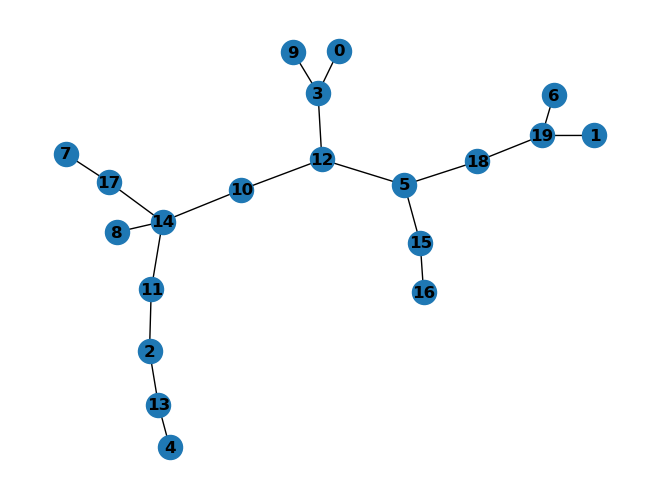

In [45]:
#print(T)
nx.draw(T, with_labels=True, font_weight='bold')
plt.show()  

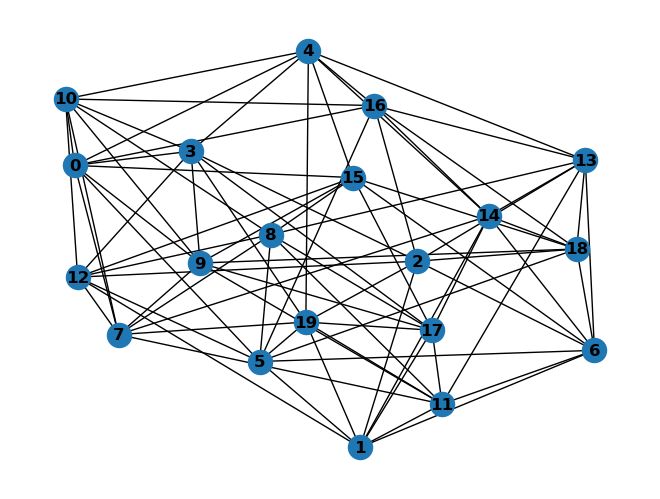

In [24]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()  

# Evenness Experiments

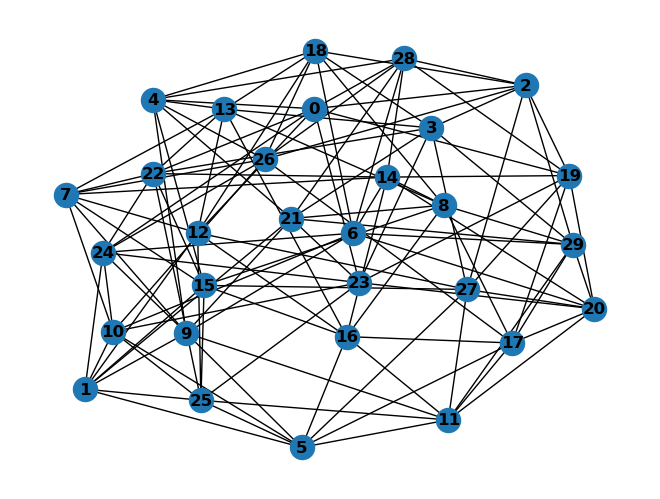

In [56]:
NUM_VERTICES = 30

four_reg_graph = grg.random_regular_graph(8, NUM_VERTICES)
nx.draw(four_reg_graph, with_labels=True, font_weight='bold')
plt.show()  

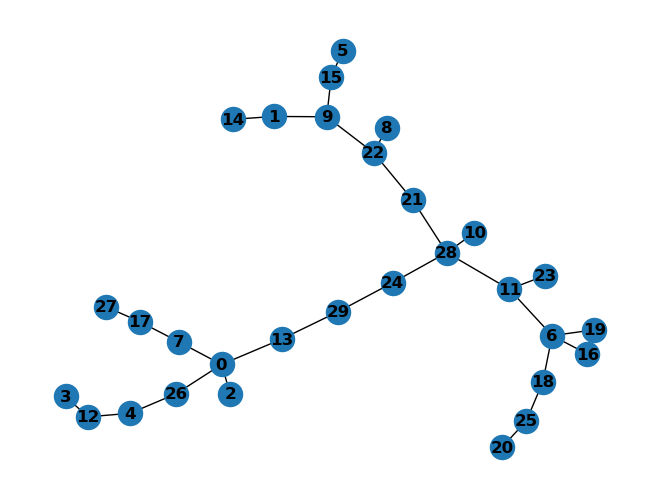

In [26]:
spT = wilsons_algorithm(four_reg_graph)
nx.draw(spT, with_labels=True, font_weight='bold')
plt.show()  

In [64]:
def experiments(G):
    edges = list(G.edges)

    nodes_evenness = dict(zip(range(NUM_VERTICES), [0 for dkaf in range(NUM_VERTICES)]))  # how many trees had vertex v even
    edges_evenness = dict(zip(edges, [0 for dkag in range(len(edges))]))  # how many trees had edge e even
    marginals = dict(zip(edges, [0 for dkag in range(len(edges))]))       # how many trees had edge e appear
    even_and_present = dict(zip(edges, [0 for dkag in range(len(edges))])) 

    for j in range(1000):
        tree = wilsons_algorithm(G)

        for vertex in range(NUM_VERTICES): 
            if len(list(tree.neighbors(vertex))) % 4 == 0: 
                nodes_evenness[vertex] += 1
        for edge in edges:
            x, y = edge
            node_0 = len(list(tree.neighbors(edge[0])))
            node_1 = len(list(tree.neighbors(edge[1])))
            if (node_0 % 2 == 0 and node_1 % 2 == 0): #or (node_0 == 4 and node_1 == 2): 
                edges_evenness[edge] += 1
            if (x, y) in list(tree.edges()) or (y, x) in list(tree.edges()):
                marginals[edge] += 1
            else:
                if (node_0 % 2 == 0 and node_1 % 2 == 0): 
                    even_and_present[edge] += 1
    return nodes_evenness, edges_evenness, marginals, even_and_present

In [65]:
nodes_evenness, edges_evenness, marginals, even_and_present = experiments(four_reg_graph)

In [66]:
desired_dict = even_and_present

for e in desired_dict.keys():
    print(desired_dict[e]/1000)

0.127
0.111
0.12
0.145
0.131
0.132
0.138
0.148
0.144
0.137
0.134
0.137
0.122
0.148
0.146
0.144
0.134
0.14
0.124
0.155
0.133
0.134
0.14
0.145
0.123
0.153
0.151
0.134
0.137
0.138
0.139
0.145
0.133
0.148
0.154
0.126
0.141
0.13
0.139
0.137
0.145
0.141
0.131
0.147
0.153
0.134
0.13
0.125
0.115
0.148
0.159
0.143
0.121
0.122
0.108
0.134
0.132
0.136
0.13
0.149
0.132
0.123
0.142
0.142
0.149
0.132
0.141
0.13
0.129
0.128
0.145
0.137
0.119
0.127
0.135
0.124
0.137
0.143
0.145
0.14
0.125
0.126
0.133
0.148
0.121
0.117
0.129
0.138
0.129
0.129
0.132
0.121
0.125
0.138
0.134
0.133
0.139
0.126
0.127
0.133
0.155
0.138
0.148
0.132
0.114
0.127
0.118
0.131
0.12
0.135
0.11
0.126
0.128
0.149
0.139
0.139
0.13
0.14
0.149
0.146
